In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

<Figure size 640x480 with 0 Axes>

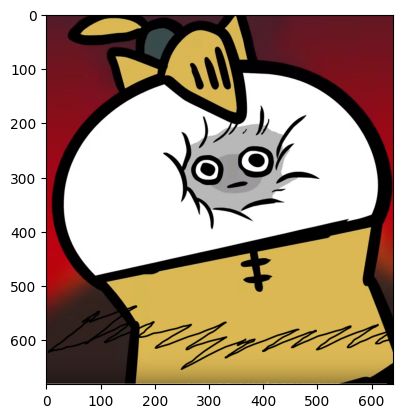

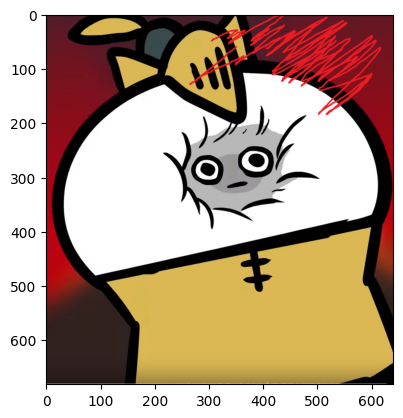

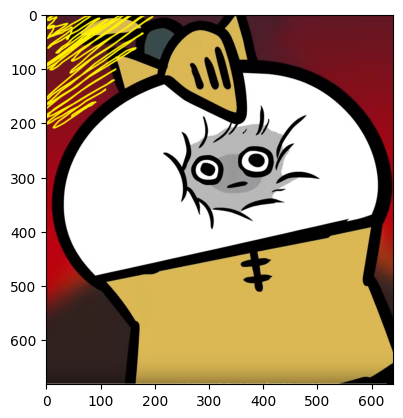

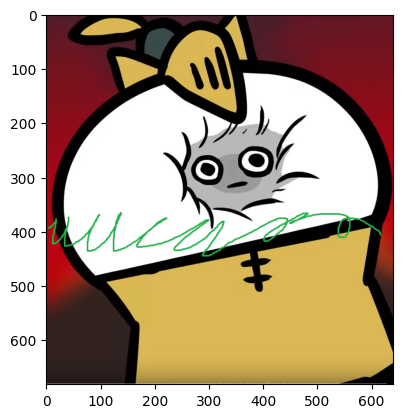

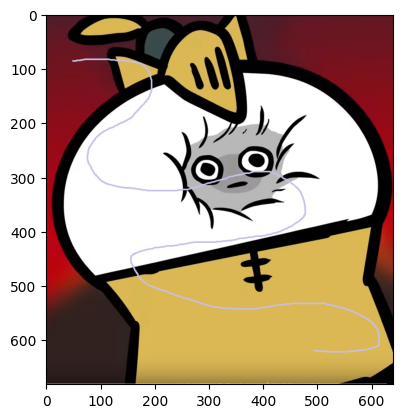

<Figure size 640x480 with 0 Axes>

In [64]:
pic1 = plt.imread('Oh no 1.png')
plt.imshow(pic1)
plt.figure()
pic2 = plt.imread('Oh no 2.png')
plt.imshow(pic2)
plt.figure()
pic3 = plt.imread('Oh no 3.png')
plt.imshow(pic3)
plt.figure()
pic4 = plt.imread('Oh no 4.png')
plt.imshow(pic4)
plt.figure()
pic5 = plt.imread('Oh no 5.png')
plt.imshow(pic5)
plt.figure()

<Figure size 640x480 with 0 Axes>

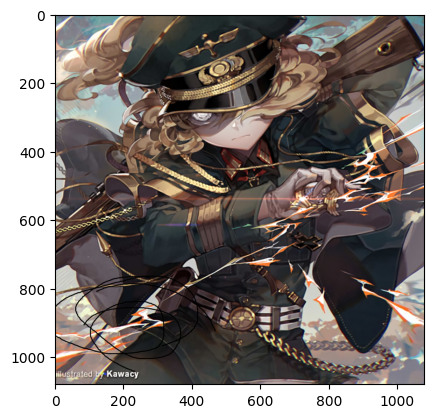

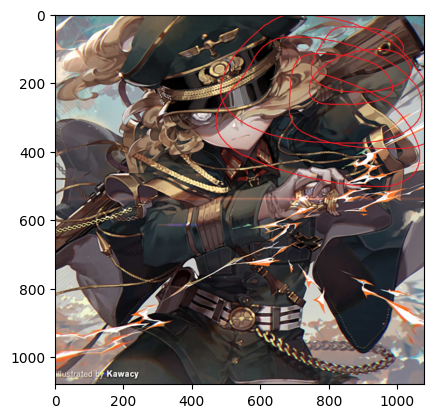

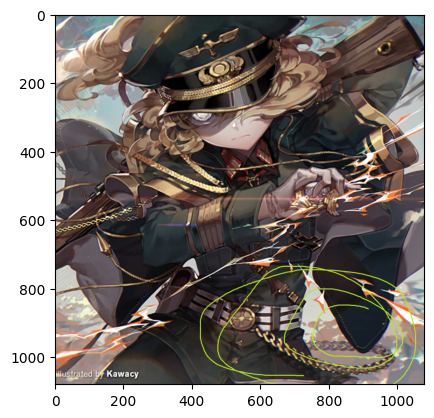

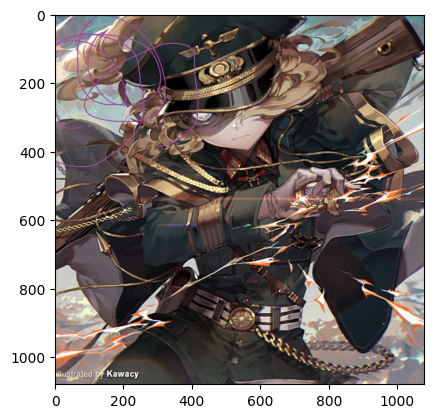

<Figure size 640x480 with 0 Axes>

In [65]:
p1 = plt.imread('test1.png')
plt.imshow(p1)
plt.figure()
p2 = plt.imread('test2.png')
plt.imshow(p2)
plt.figure()
p3 = plt.imread('test3.png')
plt.imshow(p3)
plt.figure()
p4 = plt.imread('test4.png')
plt.imshow(p4)
plt.figure()

<Figure size 640x480 with 0 Axes>

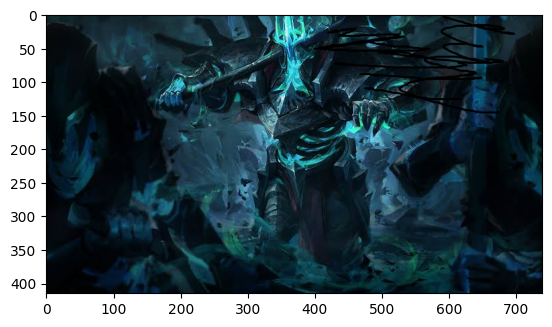

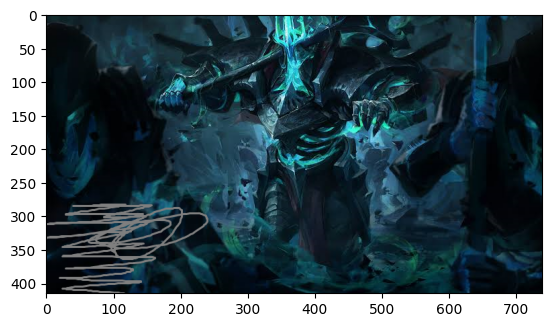

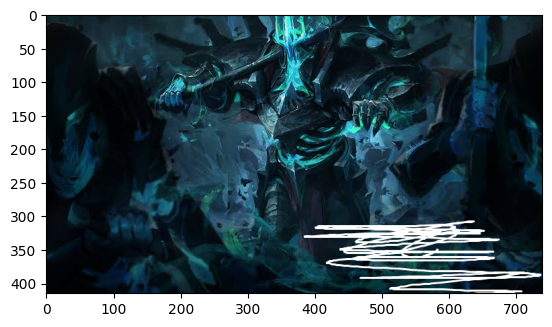

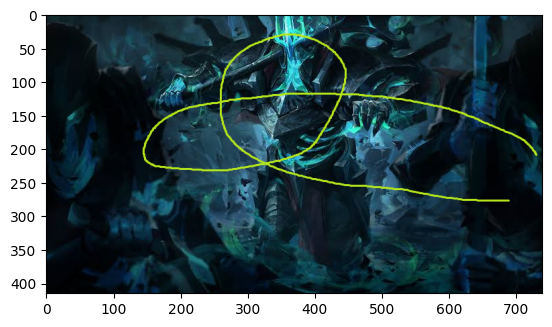

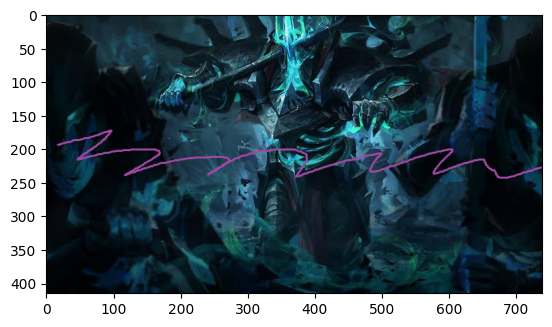

<Figure size 640x480 with 0 Axes>

In [66]:
t1 = plt.imread('Test2_1.png')
plt.imshow(t1)
plt.figure()
t2 = plt.imread('Test2_2.png')
plt.imshow(t2)
plt.figure()
t3 = plt.imread('Test2_3.png')
plt.imshow(t3)
plt.figure()
t4 = plt.imread('Test2_4.png')
plt.imshow(t4)
plt.figure()
t5 = plt.imread('Test2_5.png')
plt.imshow(t5)
plt.figure()

In [67]:
# (X, Y, Colors)
numX, numY, color = pic1.shape
print(f"Size of X: {numX}")
print(f"Size of Y: {numY}")
# Image to manipulate using pic1 as reference
original = pic1
# Images to run through
images = [pic1, pic2, pic3, pic4, pic5]

Size of X: 682
Size of Y: 641


In [68]:
# Different set of images
numX, numY, color = p1.shape
print(f"Size of X: {numX}")
print(f"Size of Y: {numY}")
original = p1
images = [p1, p2, p3, p4]

Size of X: 1080
Size of Y: 1080


In [69]:
# Another set of images
numX, numY, color = t1.shape
print(f"Size of X: {numX}")
print(f"Size of Y: {numY}")
original = t1
images = [t1, t2, t3, t4, t5]

Size of X: 415
Size of Y: 739


Function took 8.029176712036133 seconds to run.


<Figure size 640x480 with 0 Axes>

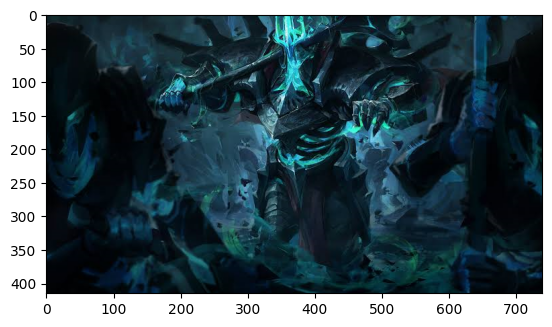

<Figure size 640x480 with 0 Axes>

In [70]:
# Normal Implementation
start_time = time.time()
for i in range(numX): # Runthrough X
  for j in range(numY): # Runthrough Y
    k = 0
    lst = {} # Make a dict that keeps track of all images[X][Y]
    for image in images:
      tick = 0 # Duplicate Checker
      for check in lst:
        if np.array_equal(lst[check], image[i][j]) == True: # Is there a duplicate
          checker = check
          tick = 1
          continue
      if tick == 1: # Update the dict
        lst[(checker[0], checker[1]+1)] = lst.pop(checker)
      else: # Add a new pixel to the dict
        lst[(k, 1)] = image[i][j]
        k+=1
    max_key = max(lst, key=lambda x: x[1]) # Find the most occuring pixel
    original[i][j] = lst[max_key] # Replace the pixel

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Function took {elapsed_time} seconds to run.")
plt.imshow(original)
plt.figure()

Function took 6.774877071380615 seconds to run.


<Figure size 640x480 with 0 Axes>

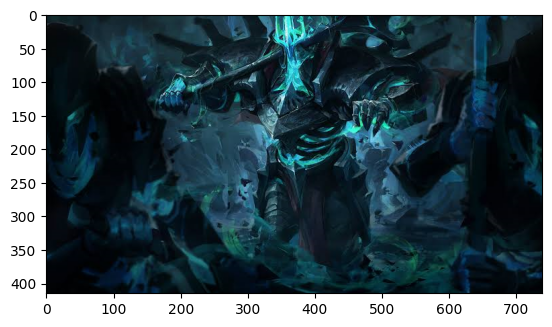

<Figure size 640x480 with 0 Axes>

In [71]:
# Use Futures to run through X
def process(pictures, x, y):
  a = []
  for j in range(y):
    k = 0
    lst = {}
    for picture in pictures:
      tick = 0
      for check in lst:
        if np.array_equal(lst[check], picture[x][j]) == True:
          checker = check
          tick = 1
          continue
      if tick == 1:
        lst[(checker[0], checker[1]+1)] = lst.pop(checker)
      else:
        lst[(k, 1)] = picture[x][j]
        k+=1
    max_key = max(lst, key=lambda x: x[1])
    a.append((lst[max_key], x, j))
  return a

with ThreadPoolExecutor() as executor:
  start_time = time.time()
  futures = [executor.submit(process, images, i, numY) for i in range(numX)]
  for future in as_completed(futures):
      fut = future.result()
      for f in fut:
        original[f[1]][f[2]] = f[0]

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Function took {elapsed_time} seconds to run.")
plt.imshow(original)
plt.figure()

Function took 21.124011039733887 seconds to run.


<Figure size 640x480 with 0 Axes>

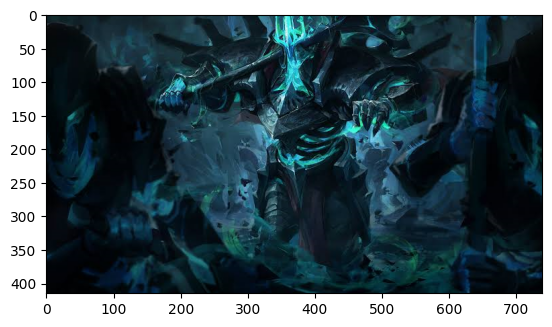

<Figure size 640x480 with 0 Axes>

In [72]:
# Use Futures to run through Y
def process(pictures, x, y):
  k = 0
  lst = {}
  for picture in pictures:
    tick = 0
    for check in lst:
      if np.array_equal(lst[check], picture[x][y]) == True:
        checker = check
        tick = 1
        continue
    if tick == 1:
      lst[(checker[0], checker[1]+1)] = lst.pop(checker)
    else:
      lst[(k, 1)] = picture[x][y]
      k+=1
  max_key = max(lst, key=lambda x: x[1])
  return (lst[max_key], x, y)

with ThreadPoolExecutor() as executor:
  start_time = time.time()
  for i in range(numX):
      futures = [executor.submit(process, images, i, j) for j in range(numY)]
      for future in as_completed(futures):
        a = future.result()
        original[a[1]][a[2]] = a[0]

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Function took {elapsed_time} seconds to run.")
plt.imshow(original)
plt.figure()

Function took 30.30603337287903 seconds to run.


<Figure size 640x480 with 0 Axes>

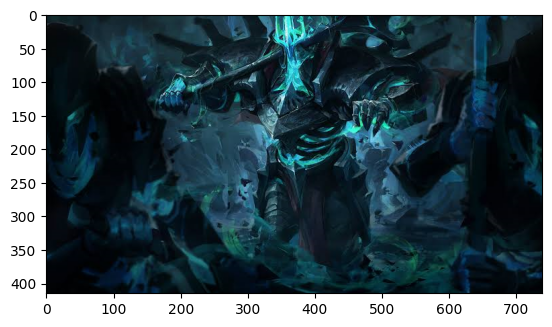

<Figure size 640x480 with 0 Axes>

In [73]:
# Use Futures for image comparison
def process(pictures, x, y):
  k = 0
  lst = {}
  for picture in pictures:
    tick = 0
    for check in lst:
      if np.array_equal(lst[check], picture[x][y]) == True:
        checker = check
        tick = 1
        continue
    if tick == 1:
      lst[(checker[0], checker[1]+1)] = lst.pop(checker)
    else:
      lst[(k, 1)] = picture[x][y]
      k+=1
  max_key = max(lst, key=lambda x: x[1])
  return (lst[max_key], x, y)

with ThreadPoolExecutor() as executor:
  start_time = time.time()
  for i in range(numX):
    for j in range(numY):
      future = executor.submit(process, images, i, j)
      a = future.result()
      original[a[1]][a[2]] = a[0]

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Function took {elapsed_time} seconds to run.")
plt.imshow(original)
plt.figure()